## ___Linear regression with one predictor variable.___
--------------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

In [2]:
beans = pd.read_csv(r"./Dry_Bean_Dataset.csv")
beans.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [3]:
beans.shape

(13611, 17)

In [4]:
# regression is used for continuous variables, so lets pick a continuous variable
x = beans.loc[:, "MajorAxisLength"].to_numpy()
y = beans.loc[:, "Area"].to_numpy()

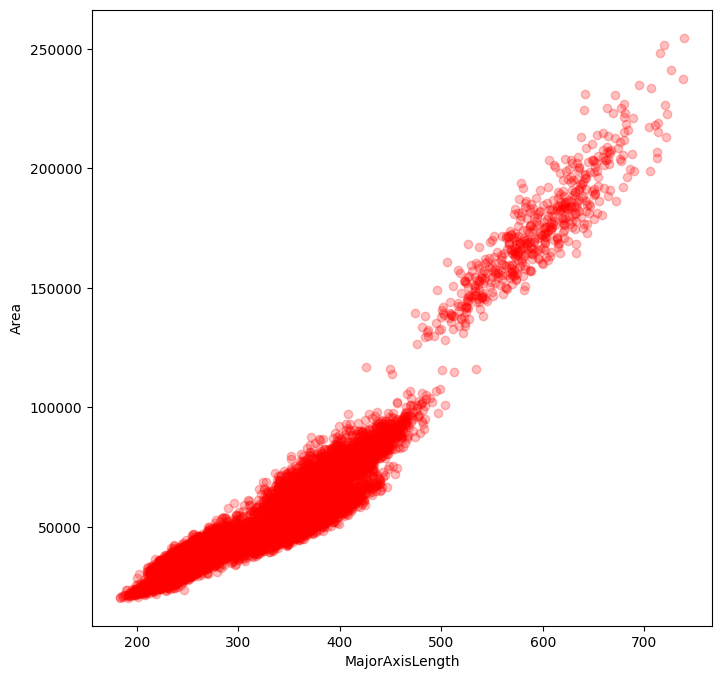

In [5]:
# don't know what the units used in the dataset though :(

fig, axes = plt.subplots()
fig.set_size_inches(8, 8)
axes.scatter(x, y, alpha = 0.25, color = "red")
axes.set_xlabel("MajorAxisLength")
axes.set_ylabel("Area")
plt.show()

In [6]:
# there seems to be two distinct clusters.
# linear regression is all about fitting a line to the data.
# if we manage to deduce a linear relationship between the x (predictor) and y (output) variables, the using that relationship
# we could make predictions for unknown x data points.

In [7]:
train_x, test_x, train_y, test_y = train_test_split(x.reshape(-1, 1), y, train_size = 0.8)

In [8]:
[x.shape for x in [train_x, test_x, train_y, test_y]]

[(10888, 1), (2723, 1), (10888,), (2723,)]

In [20]:
# let's find out the coefficient,
model = LinearRegression(n_jobs = 18)
model.fit(train_x, train_y)

LinearRegression(n_jobs=18)

In [21]:
model.coef_, model.intercept_

(array([318.82399124]), -49072.85372256354)

In [22]:
preds = model.predict(test_x)

In [23]:
# not bad huh?
pearsonr(preds, test_y)

PearsonRResult(statistic=0.9355660322636616, pvalue=0.0)

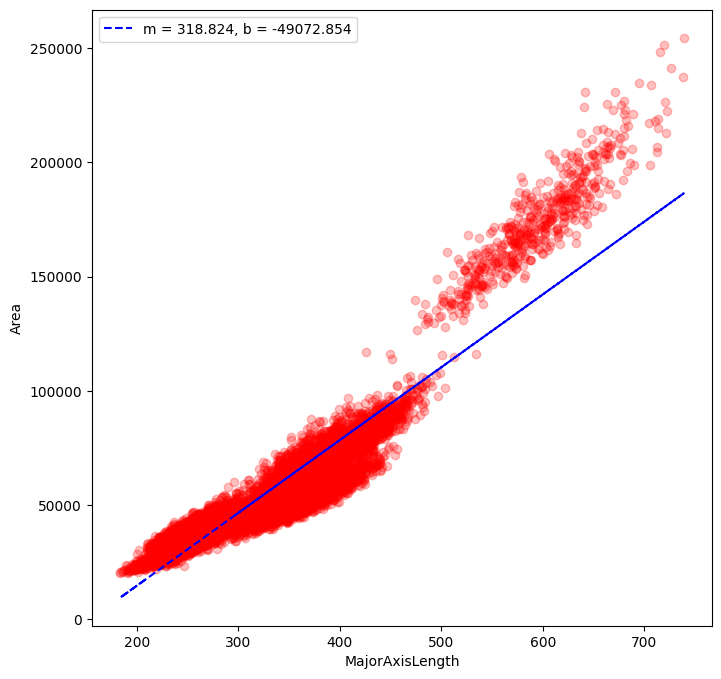

In [25]:
# let's see how close our model is to the real data.

fig, axes = plt.subplots()
fig.set_size_inches(8, 8)
axes.scatter(x, y, alpha = 0.25, color = "red")
axes.plot(x, x * model.coef_ + model.intercept_, color = "blue", linestyle = "--", marker = "none",
          label = f"m = {model.coef_[0]:.3f}, b = {model.intercept_:.3f}")
axes.set_xlabel("MajorAxisLength")
axes.set_ylabel("Area")
plt.legend()
plt.show()

In [60]:
# well, that's not that impressive :(

In [61]:
# this is  called supervised learning as we fed in the predictor and predictions to te model to learn from
# so the model had access to a string of predictors and correct predictions to learn the associations.

# supervised learning models that predict numerical continuous variables are called regression models.
# supervised learning models that predict categorical variables are called classification models. (categorical nominal or categorical ordinal)
# the principle distinction is that in classification there are only a small finite number of possible outcomes.

## ___HOW EXACTLY A SUPERVISED LEARNING ALGORITHM WORKS?___
---------------------------

In [31]:
# training set will typically include N number of features and a target variable
# once trained the supervised learning algorithm would have learned a function that maps the predictors to the targets as best as possible.
# when provided with new data, it just uses that function to propose predictions.
# "function" here is just a fancy word for learned associations between predictors and the target.

# in ML x hat is used to mark the predictions (estimates) made for x

## $f(x) = \hat{y}$

In [32]:
# x is the input and the prediction is y
# the function f is called the model.

In [33]:
# in standard ML parlance, input data is denoted as lowercase x
# labels (targets) are denoted as lowecase y

Training examples (records) are referred to as ($x^{i}, y^{i}$) where, i registers the ith record/row in the dataset.

In [34]:
# The question now is how to define the function f?
# what exactly the function f does to generate the predictions?

In [ ]:
# let's imagine our regression model as a simple y = mx + b equation.
# function f takes in the training data and training labels to learn the m and b and then uses them to make the predictions.
# f(x) = mx + b
# where m is the slope and b is a constant bias term.

# ONE MAY ASK WHAT'S THE REASON BEHIND CHOOSING A LINEAR FUNCTION y = mx + b?
# non-linear functions are in fact necessary in modelling complex datasets. 
# A linear function is choosen here primarily for simplicity.
# regression models that use linear equations are called linear regression models.
# linear regression models with one feature (one input variable) is univariate linear regression